15


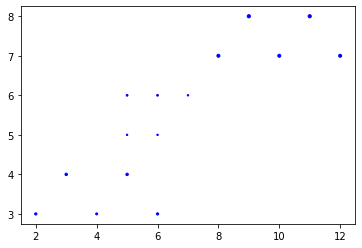

In [130]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

data_points = [
    [2,3,5],[3,4,6],[4,3,4],[5,4,6],[6,3,5],
    [8,7,9],[9,8,10],[10,7,9],[11,8,10],[12,7,9],
    [5,5,2],[6,5,2],[5,6,3],[6,6,3],[7,6,2],
]

print(len(data_points))

x= [point[0] for point in data_points]
y= [point[1] for point in data_points]
z= [point[2] for point in data_points]

plt.scatter(x,y,z,c='b')


In [131]:
def EucliedeanDistance(point1, point2):
    return np.sqrt(sum([(a - b) ** 2 for a, b in zip(point1, point2)]) ** 0.5)

In [123]:
def k_means(data, k, maxIterations=50):
    centroids = random.sample(data,k)

    for _ in range(maxIterations):
        clusters = [[] for _ in range(k)]
        for point in data:
            distance_dict = {}
            for i in range(k):
                distance_dict[i]=EucliedeanDistance(point,centroids[i])
            sorted_distance_dict = sorted(distance_dict.items(), key=lambda word:word[1], reverse=False)
            sorted_distance_dict = dict(sorted_distance_dict)

            for keys in sorted_distance_dict.keys():
                if keys == 0 and len(clusters[keys]) > 3:
                    continue
                elif keys == 1 and len(clusters[keys]) > 3:
                    continue
                else :
                    clusters[keys].append(point)
                    break
            
        new_centroids = []
        for cluster in clusters:
            if len(cluster)==0:
                new_centroids.append(centroids[clusters.index(cluster)])
            else :
                sum_x = sum(point[0] for point in cluster)
                sum_y = sum(point[1] for point in cluster)
                sum_z = sum(point[2] for point in  cluster)
                new_centroid = (sum_x / len(cluster), sum_y / len(cluster), sum_z/len(cluster))
                new_centroids.append(new_centroid)
                
        if centroids==new_centroids:
            break
        centroids = new_centroids
    
    return centroids, clusters


Centroid 1: (8.25, 6.25, 8.25)
lenght of cluster 1 : 4
clusters contains the following points :  [[6, 3, 5], [8, 7, 9], [9, 8, 10], [10, 7, 9]]
Centroid 2: (3.5, 3.5, 5.25)
lenght of cluster 2 : 4
clusters contains the following points :  [[2, 3, 5], [3, 4, 6], [4, 3, 4], [5, 4, 6]]


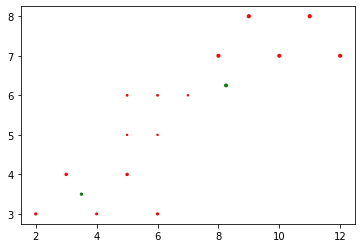

In [134]:
centroids, clusters = k_means(data_points, k=2)

c_x = [centroid[0] for centroid in centroids]
c_y = [centroid[1] for centroid in centroids]
c_z = [centroid[2] for centroid in centroids]

plt.scatter(x,y,z,c='r')
plt.scatter(c_x,c_y,c_z,c='g')
plt.plot()


for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {centroid}")
    print(f"lenght of cluster {i+1} :", len(clusters[i]))
    print("clusters contains the following points : ", clusters[i])
